In [60]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 2. Import feature function
import sys
import os
sys.path.append('../src')  # allow importing from src/

# 3. Import the feature generation function
from feature_engineering import generate_user_features



In [66]:
features = generate_user_features(df)
features.head(10)

C:\Users\Cesar Dushimimana\AppData\Local\Temp\ipykernel_19696\1168045382.py:48: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_time_between = grouped.apply(avg_time_between_txn).rename('avg_time_between_txn_hrs')


,userid,total_deposit_usd,total_borrow_usd,borrow_deposit_ratio,num_unique_assets,num_transactions,days_active,avg_txn_amount_usd,avg_time_between_txn_hrs
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,1.987664e+09,0.000000e+00,0.000000e+00,1,1,0,1.987664e+09,0.000000
1,0x000000000051d07a4fb3bd10121a343d85818da6,2.856945e+20,0.000000e+00,0.000000e+00,1,1,0,2.856945e+20,0.000000
2,0x000000000096026fb41fc39f9875d164bd82e2dc,5.152311e+15,0.000000e+00,0.000000e+00,1,2,7,2.576155e+15,181.779167
3,0x0000000002032370b971dabd36d72f3e5a7bf1ee,2.065773e+23,6.029762e+22,2.918889e-01,6,399,132,9.517531e+20,8.012014
4,0x000000000a38444e0a6e37d3b630d7e855a7cb13,1.839067e+22,1.163143e+10,6.324638e-13,5,25,39,9.203232e+20,39.280174
5,0x000000003853fcedcd0355fec98ca3192833f00b,7.637632e+16,0.000000e+00,0.000000e+00,7,8,7,9.547039e+15,27.048690
6,0x000000003ce0cf2c037493b1dc087204bd7f713e,4.585862e+23,1.324158e+23,2.887478e-01,7,492,123,1.810733e+21,6.036733
7,0x000000007858e6f2668e1e06111cfa24403a5466,1.421607e+17,0.000000e+00,0.000000e+00,1,1,0,1.421607e+17,0.000000
8,0x00000001a0f57e850c9db68b4a9bc34677437c5c,1.766653e+06,0.000000e+00,0.000000e+00,1,1,0,1.766653e+06,0.000000
9,0x0000000506063a51c6ce59906d8c40f7d7fe92a7,7.999917e+23,5.975020e+23,7.468852e-01,1,69,30,4.052370e+22,10.819833


In [67]:
# Simulate a binary target variable for now
np.random.seed(42)
features['defaulted'] = np.random.choice([0, 1], size=len(features), p=[0.8, 0.2])


In [68]:
X = features.drop(['userid', 'defaulted'], axis=1)
y = features['defaulted']


In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [70]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [71]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[547  13]
 [137   3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88       560
           1       0.19      0.02      0.04       140

    accuracy                           0.79       700
   macro avg       0.49      0.50      0.46       700
weighted avg       0.68      0.79      0.71       700



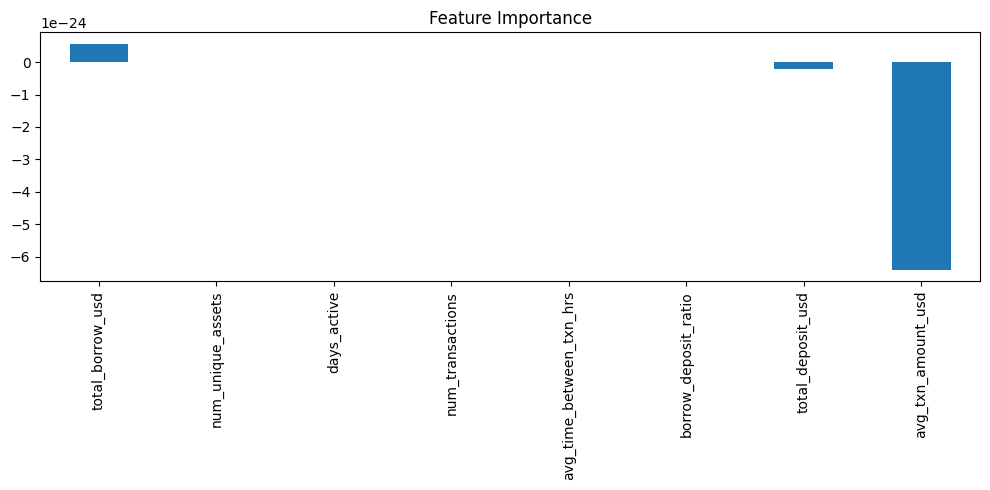

In [72]:
feature_importance = pd.Series(model.coef_[0], index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title="Feature Importance")
plt.tight_layout()
plt.show()
